## Building Neural Network from Scratch for Customer Data Classification and Analysis

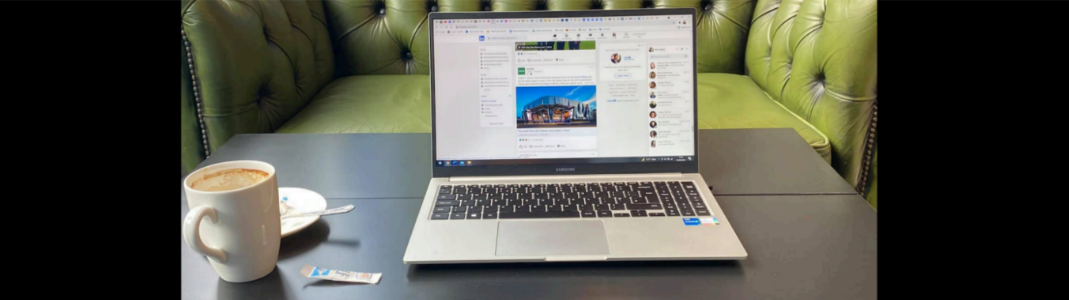

### Hemant Thapa

#### Table of Contents
1. [Import Libraries](#Import-Libraries)
2. [Loading DataSet](#Loading-DataSet)
3. [Feature Engineering](#Feature-Engineering)
4. [He Initialisation](#He-Initialisation)
5. [Activation Function](#Activation-Function)
    - 5.1 [Sigmoid Activation Function](#Sigmoid-Activation-Function)
    - 5.2 [ReLU Activation Function](#ReLU-Activation-Function)
6. [Forward Propagation](#Forward-Propagation)
7. [Computing Loss](#Computing-Loss)
8. [Backward Propagation](#Backward-Propagation)
9. [Update Parameters](#Update-Parameters)
10. [Training Model](#Training-Model)
11. [Splitting Data into Train and Test](#Splitting-Data-into-Train-and-Test)
12. [Loss and Accuracy](#Loss-and-Accuracy)
13. [Predictive Analysis & Decision Boundary](#Predictive-Analysis-&-Decision-Boundary)
14. [Model Evaluation & Classification Report](#Model-Evaluation-&-Classiication-Report)


#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2. Loading DataSet

In [2]:
df = pd.read_csv('customer_data.csv')
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [5]:
df.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [6]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


#### 3. Feature Engineering 

In [7]:
#feature selection
#value reshaping into two dimension
X = df.iloc[:, 2:4].values.reshape(-1, 2)

In [8]:
X[:5]

array([[    35,  20000],
       [    40,  43500],
       [    49,  74000],
       [    40, 107500],
       [    25,  79000]], dtype=int64)

In [9]:
#standard scaler 
#(data points - data means) / data standard deviation
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X[:5]

array([[-0.47711966, -1.52849808],
       [-0.00990495, -0.84676745],
       [ 0.83108153,  0.03803187],
       [-0.00990495,  1.00986063],
       [-1.41154909,  0.18308093]])

In [10]:
#target
y = df.iloc[:, 4].values
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [11]:
#checking dimension 
print("Number of dimensions:", X.ndim)
print("Number of dimensions:", y.ndim)

Number of dimensions: 2
Number of dimensions: 1


In [12]:
# def initialise_parameters(X_neurons, hiddenLayer_neuron_1, hiddenLayer_neuron_2, y_neurons):
#     np.random.seed(2)
#     parameters = {
#         "w1": np.random.randn(hiddenLayer_neuron_1, X_neurons) * 0.01,
#         "b1": np.zeros((hiddenLayer_neuron_1, 1)),
#         "w2": np.random.randn(hiddenLayer_neuron_2, hiddenLayer_neuron_1) * 0.01,
#         "b2": np.zeros((hiddenLayer_neuron_2, 1)),
#         "w3": np.random.randn(y_neurons, hiddenLayer_neuron_2) * 0.01,
#         "b3": np.zeros((y_neurons, 1))
#     }
#     return parameters

#### 4. He Initialisation 



$$ \text{He Initialization} = \sqrt{\frac{2}{n}} $$

- $ n $ is the number of input units in the layer.

This initialization method helps in preventing the vanishing or exploding gradient problems that can occur during training, especially in deep neural networks.


In [13]:
#function for he initialisation
def initialise_parameters_he(X_neurons, hiddenLayer_neuron_1, hiddenLayer_neuron_2, y_neurons):
    #reproducible results
    np.random.seed(2)  
    parameters = {
        #input layer
        #weight and bias for layer one 
        "w1": np.random.randn(hiddenLayer_neuron_1, X_neurons) * np.sqrt(2. / X_neurons),
        "b1": np.zeros((hiddenLayer_neuron_1, 1)),
        #hidden layer
        #weight and bias for layer two
        "w2": np.random.randn(hiddenLayer_neuron_2, hiddenLayer_neuron_1) * np.sqrt(2. / hiddenLayer_neuron_1),
        "b2": np.zeros((hiddenLayer_neuron_2, 1)),
        #output layer
        #weight and bias for layer three
        "w3": np.random.randn(y_neurons, hiddenLayer_neuron_2) * np.sqrt(2. / hiddenLayer_neuron_2),
        "b3": np.zeros((y_neurons, 1))
    }
    #returning parameters
    return parameters

In [14]:
#input shape, two rows for features
X_neurons = X.shape[1]
print(f"Input shape: {X_neurons}")

Input shape: 2


In [15]:
#calling function to check parameters
parameters = initialise_parameters_he(X_neurons, 2, 2, 1)
print(parameters)

{'w1': array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081]]), 'b1': array([[0.],
       [0.]]), 'w2': array([[-1.79343559, -0.84174737],
       [ 0.50288142, -1.24528809]]), 'b2': array([[0.],
       [0.]]), 'w3': array([[-1.05795222, -0.90900761]]), 'b3': array([[0.]])}


#### 5. Activation Function 

##### Sigmoid Activation Function

The sigmoid activation function, also known as the logistic function, is a widely used activation function in neural networks. It takes an input and maps it to a value between 0 and 1, making it suitable for binary classification tasks and ensuring that the output is in the range of probabilities. The sigmoid function is defined as:

$$ \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

- $ x $  is the input to the function.

The sigmoid function has a smooth, S-shaped curve, but it suffers from the vanishing gradient problem, which can make training deep networks challenging.

##### ReLU (Rectified Linear Unit) Activation Function

The ReLU activation function is another widely used activation function, especially in deep neural networks. It introduces non-linearity by mapping all negative values to zero and leaving positive values unchanged. The ReLU function is defined as:

$$ \text{ReLU}(x) = \max(0, x) $$

- $ x $ is the input to the function.

ReLU has become popular because it helps mitigate the vanishing gradient problem, allowing for faster convergence during training. However, it's important to note that it may suffer from the dying ReLU problem, where some neurons become inactive and never activate during training.


In [16]:
#activation functions
#sigmoid 
def sigmoid(z):
    return 1/ (1 +  np.exp(-z))
#relu 
def relu(z):
    return np.maximum(0, z)

#### 6. Forward Propagation 

Forward propagation is the process by which input data is passed through a neural network to compute the network's output or predictions. It involves several steps, including the calculation of weighted sums and the application of activation functions. 

1. **Input Layer**: The first layer of the neural network is the input layer. It receives the raw input data, which could be features from a dataset or any other form of input.

2. **Weighted Sum (Linear Transformation)**: For each neuron in the subsequent layers (hidden and output layers), a weighted sum of the inputs is calculated. This is done by multiplying the input values by their corresponding weights and summing up these products. Mathematically, for a neuron $i$ in layer $j$, the weighted sum ($z_{ij}$) is computed as:

   $$ z_{ij} = \sum_{k=1}^{n} (w_{ijk} \cdot a_{(j-1)k}) + b_{ij} $$


- $w_{ijk}$ is the weight of the connection between neuron $i$ in layer $j$ and neuron $k$ in layer $j-1$.
- $a_{(j-1)k}$ is the output of neuron $k$ in layer $j-1$.
- $b_{ij}$ is the bias term associated with neuron $i$ in layer $j$.
     

3. **Activation Function**: After calculating the weighted sum, an activation function is applied element-wise to the result. Common activation functions include the sigmoid, ReLU, and others. The choice of activation function depends on the network architecture and problem.

   $$ a_{ij} = \text{Activation}(z_{ij}) $$

4. **Propagation**: The output of each neuron in one layer becomes the input to neurons in the next layer. This process is repeated for each layer until the output layer is reached.

5. **Output Layer**: The final layer of the neural network is the output layer. Depending on the problem, the output layer may use a specific activation function (e.g., sigmoid for binary classification, softmax for multiclass classification) to produce the network's final predictions.

6. **Output**: The output of the last layer represents the network's prediction or output for the given input data. It can be used to make decisions, compute loss, and update the network's weights during the training process.


In [17]:
#forward propagation 
def forward_propagation(X, parameters):
    #transpose feature matrix to match the shape expected by the neural network
    X = X.T
    #declaring local variable for weights and bias
    #layer 1, layer 2 and layer 3 parameters (weight and bias)
    weight_1, bias_1 = parameters['w1'], parameters['b1']
    weight_2, bias_2 = parameters['w2'], parameters['b2']
    weight_3, bias_3 = parameters['w3'], parameters['b3']
    
    #pre-activation or Z1 value for the first layer using the dot product of weights and input plus the bias
    #applying the ReLU activation function to the pre-activation values for layer 1
    pre_activation_layer_1 = np.dot(weight_1, X) + bias_1
    activation_function_layer_1 = relu(pre_activation_layer_1)
    #pre-activation or Z2 value for the second layer using the dot product of weights and input plus the bias
    #applying the ReLU activation function to the pre-activation values for layer 2
    pre_activation_layer_2 = np.dot(weight_2, activation_function_layer_1) + bias_2
    activation_function_layer_2 = relu(pre_activation_layer_2)
    #pre-activation or Z3 value for the second layer using the dot product of weights and input plus the bias
    #applying the sigmoid activation function to the pre-activation values for layer 3
    pre_activation_layer_3 = np.dot(weight_3, activation_function_layer_2) + bias_3
    activation_function_layer_3 = sigmoid(pre_activation_layer_3)  
    
    #cache data of pre-activation and activation values of each layer for use in backpropagation
    cache = { "z1": pre_activation_layer_1, "a1": activation_function_layer_1,
              "z2":pre_activation_layer_2,  "a2": activation_function_layer_2,
              "z3":pre_activation_layer_3,  "a3": activation_function_layer_3
            }
    return activation_function_layer_3, cache


Let's break down the steps mathematically:

1. **Transpose Input Data**:
   - $X^T$ represents the transposed input feature matrix. This operation ensures that the dimensions of the input data align correctly with the weight matrices.

2. **Layer Parameters**:
   - For Layer 1:
     - $weight_1$ represents the weight matrix for Layer 1.
     - $bias_1$ represents the bias vector for Layer 1.
   - For Layer 2:
     - $weight_2$ represents the weight matrix for Layer 2.
     - $bias_2$ represents the bias vector for Layer 2.
   - For Layer 3 (Output Layer):
     - $weight_3$ represents the weight matrix for the output layer.
     - $bias_3$ represents the bias vector for the output layer.

3. **Compute Pre-activation Values**:
   - For Layer 1:
     - $pre\_activation\_layer\_1 = weight_1 \cdot X^T + bias_1$
   - For Layer 2:
     - $pre\_activation\_layer\_2 = weight_2 \cdot activation\_function\_layer\_1 + bias_2$
   - For Layer 3:
     - $pre\_activation\_layer\_3 = weight_3 \cdot activation\_function\_layer\_2 + bias_3$

4. **Apply Activation Functions**:
   - For Layer 1:
     - $activation\_function\_layer\_1 = \text{ReLU}(pre\_activation\_layer\_1)$
   - For Layer 2:
     - $activation\_function\_layer\_2 = \text{ReLU}(pre\_activation\_layer\_2)$
   - For Layer 3:
     - $activation\_function\_layer\_3 = \text{sigmoid}(pre\_activation\_layer\_3)$

5. **Store Intermediate Values**:
   - Intermediate values are stored in variables:
     - $activation\_function\_layer\_1$ represents the output of Layer 1.
     - $activation\_function\_layer\_2$ represents the output of Layer 2.
     - $activation\_function\_layer\_3$ represents the output of the output layer.

6. **Create Cache**:
   - A `cache` dictionary is created to store intermediate values for later use during backpropagation.

7. **Return Output and Cache**:
   - The function returns:
     - The activation values of the last layer ($activation\_function\_layer\_3$), which represent the network's output.
     - The `cache` dictionary containing intermediate values.

This mathematical representation outlines the forward propagation process in neural networks, where input data is processed through the layers to compute predictions.

In [18]:
#performing forward propagataion 
activation_function_layer_3, cache = forward_propagation(X, parameters)
activation_function_layer_3

array([[0.46749337, 0.49408363, 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.49690524, 0.5       , 0.5       ,
        0.49112616, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.48733038, 0.5       , 0.5       , 0.4466616 ,
        0.5       , 0.5       , 0.49392362, 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.49725455,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.46786489, 0.5       , 0.5       , 0.49881361, 0.48935471,
        0.5       , 0.5       , 0.5       , 0.5 

#### 7. Computing Loss

The Computing loss function calculates the loss (or cost) between the predicted values from the output layer and the actual target values. This loss is commonly used in binary classification tasks with logistic regression or sigmoid activation in the output layer.

$ \text{Loss} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

- $ m $ is the number of samples in the dataset.
- $ y^{(i)} $ represents the actual target value (ground truth) for the $ i $th sample.
- $ \hat{y}^{(i)} $ represents the predicted activation value (output) for the $ i $th sample.


In [19]:
#declaring function computing loss 
def computing_loss(activation_function_layer_3, y):
    #activation_function_layer_3 is shaped (1, m) to match y when y is reshaped to (1, m)
    #if one-dimensional and reshaped two-dimensional y
    #small value to avoid log(0)
    m = y.size  
    epsilon = 1e-5  
    #ensure Y is reshaped to (1, m) for compatibility with activation_function_layer_3
    if y.ndim == 1:
        y = y.reshape(1, m)
    #adjusting the computation to avoid log(0)
    log_probs = np.log(activation_function_layer_3 + epsilon) * y + np.log(1 - activation_function_layer_3 + epsilon) * (1 - y)
    cost = -np.sum(log_probs) / m
    #ensuring cost is the proper shape regardless of its original form
    cost = np.squeeze(cost)  
    return cost

The `computing_loss` function calculates the loss (or cost) between the predicted values from the output layer and the actual target values. This loss is commonly used in binary classification tasks with logistic regression or sigmoid activation in the output layer.

Here's a step-by-step explanation of the function:
- `activation_function_layer_3`: Represents the activation values of the output layer.
- `y`: Represents the actual target values or labels.
- `epsilon`: A small value is added to probabilities to prevent taking the logarithm of zero.
- Reshaping `y`: If `y` is one-dimensional, it's reshaped to (1, m) for compatibility.
- Log Probabilities: Log probabilities are computed for both positive and negative classes using the logistic regression loss formula.
- Cost Calculation: The average cross-entropy loss is computed.
- `cost` Reshaping: The `cost` is reshaped for proper formatting.

In [20]:
#performing computational loss
computing_loss(activation_function_layer_3, y)

0.6868510093131084

#### 8. Backward Propagation 

Backward propagation is a vital step in training neural networks, where we calculate the gradients (derivatives) of the cost function with respect to the model's parameters. These gradients are crucial for updating the model's weights and biases during training using techniques like gradient descent. Let's delve into the mathematical formulas for each step of the backward propagation process:

##### Backward Propagation for Layer 3:

1. **Derivative of Pre-Activation Values of Layer 3:**
   
   $ \frac{\partial J}{\partial Z^{[3]}} = A^{[3]} - Y $

2. **Gradients for Layer 3's Weights and Bias:**
   
   - Weight derivative:
   
     $ \frac{\partial J}{\partial W^{[3]}} = \frac{1}{m} \cdot \frac{\partial J}{\partial Z^{[3]}} \cdot A^{[2]T} $

   - Bias derivative:
   
     $ \frac{\partial J}{\partial b^{[3]}} = \frac{1}{m} \cdot \sum_{i=1}^{m} \frac{\partial J}{\partial Z^{[3](i)}} $

##### Backward Propagation for Layer 2:

3. **Derivative of Activation Values of Layer 2 with respect to Pre-Activation Values:**

   $ \frac{\partial A^{[2]}}{\partial Z^{[2]}} = \frac{\partial g^{[2]}}{\partial Z^{[2]}} $

   Here, $ g^{[2]} $ represents the activation function used in Layer 2 (typically ReLU).

4. **Derivative of Pre-Activation Values of Layer 2:**

   $ \frac{\partial J}{\partial Z^{[2]}} = \left( W^{[3]T} \cdot \frac{\partial J}{\partial Z^{[3]}} \right) \odot \frac{\partial A^{[2]}}{\partial Z^{[2]}} $

   Here, $ \odot $ represents element-wise multiplication.

5. **Gradients for Layer 2's Weights and Bias:**

   - Weight derivative:

     $ \frac{\partial J}{\partial W^{[2]}} = \frac{1}{m} \cdot \frac{\partial J}{\partial Z^{[2]}} \cdot A^{[1]T} $

   - Bias derivative:

     $ \frac{\partial J}{\partial b^{[2]}} = \frac{1}{m} \cdot \sum_{i=1}^{m} \frac{\partial J}{\partial Z^{[2](i)}} $

##### Backward Propagation for Layer 1:

6. **Derivative of Activation Values of Layer 1 with respect to Pre-Activation Values:**

   $ \frac{\partial A^{[1]}}{\partial Z^{[1]}} = \frac{\partial g^{[1]}}{\partial Z^{[1]}} $

   Here, $ g^{[1]} $ represents the activation function used in Layer 1 (typically ReLU).

7. **Derivative of Pre-Activation Values of Layer 1:**

   $ \frac{\partial J}{\partial Z^{[1]}} = \left( W^{[2]T} \cdot \frac{\partial J}{\partial Z^{[2]}} \right) \odot \frac{\partial A^{[1]}}{\partial Z^{[1]}} $

8. **Gradients for Layer 1's Weights and Bias:**

   - Weight derivative:

     $ \frac{\partial J}{\partial W^{[1]}} = \frac{1}{m} \cdot \frac{\partial J}{\partial Z^{[1]}} \cdot X^T $

   - Bias derivative:

     $ \frac{\partial J}{\partial b^{[1]}} = \frac{1}{m} \cdot \sum_{i=1}^{m} \frac{\partial J}{\partial Z^{[1](i)}} $

In [21]:
#function for backward propagation
def backward_propagation(parameters, cache, X, y):
    #total number of sample
    #X.shape[0] <- first dimension
    #X.shape[1] <- second dimension
    m = X.shape[1]
    
    #retrieve weights and activations
    weight_1, weight_2, weight_3 = parameters["w1"], parameters["w2"], parameters["w3"]
    activation_1, activation_2, activation_3 = cache["a1"], cache["a2"], cache["a3"]
    
    #backward propagation for layer 3
    derivative_pre_activation_layer_3 = activation_3 - y
    derivative_weight_layer_3 = np.dot(derivative_pre_activation_layer_3, activation_2.T) / m
    derivative_bias_layer_3 = np.sum(derivative_pre_activation_layer_3, axis=1, keepdims=True) / m
    
    #backward propagation for layer 2
    #include the derivative of the activation function used in layer 2
    #ReLU was used in layer 2
    derivative_activation_2 = np.dot(weight_3.T, derivative_pre_activation_layer_3)
    #derivative of ReLU
    derivative_pre_activation_layer_2 = derivative_activation_2 * (activation_2 > 0)  
    derivative_weight_layer_2 = np.dot(derivative_pre_activation_layer_2, activation_1.T) / m
    derivative_bias_layer_2 = np.sum(derivative_pre_activation_layer_2, axis=1, keepdims=True) / m
    
    #backward propagation for layer 1
    #assuming ReLU was used in layer 1
    derivative_activation_1 = np.dot(weight_2.T, derivative_pre_activation_layer_2)
    #derivative of ReLU
    derivative_pre_activation_layer_1 = derivative_activation_1 * (activation_1 > 0)  
    derivative_weight_layer_1 = np.dot(derivative_pre_activation_layer_1, X) / m
    derivative_bias_layer_1 = np.sum(derivative_pre_activation_layer_1, axis=1, keepdims=True) / m

    gradients = {
        "dw1": derivative_weight_layer_1,
        "db1": derivative_bias_layer_1,
        "dw2": derivative_weight_layer_2,
        "db2": derivative_bias_layer_2,
        "dw3": derivative_weight_layer_3,
        "db3": derivative_bias_layer_3
    }
    return gradients

In [22]:
#calcualting gradients using backward propagation 
grads = backward_propagation(parameters, cache, X, y)
print(grads)

{'dw1': array([[ 5.98524362, 13.07426084],
       [-2.68122566, -3.36305935]]), 'db1': array([[-14.91312239],
       [  2.63436763]]), 'dw2': array([[ 0.        ,  0.        ],
       [-6.42307374, -0.16967617]]), 'db2': array([[  0.        ],
       [-29.65534593]]), 'dw3': array([[0.        , 3.32092786]]), 'db3': array([[47.37386964]])}


#### 9. Update Parameters 

In the training of neural networks, updating the model's parameters, which include weights and biases, is a pivotal step. This process relies on gradient information to iteratively adjust the parameters in order to minimize the loss function—a measure of how far the model's predictions are from the actual values. The parameter update is performed using the gradient descent algorithm or its variants, and the formulas for updating parameters at each layer \(i\) are as follows:

- **Weight Update Formula:**

  $$W^{[i]} = W^{[i]} - \alpha \times \frac{\partial J}{\partial W^{[i]}}$$

- **Bias Update Formula:**

  $$b^{[i]} = b^{[i]} - \alpha \times \frac{\partial J}{\partial b^{[i]}}$$

Where:
- $W^{[i]}$ and $b^{[i]}$ represent the weights and biases of layer $i$, respectively.
- $\frac{\partial J}{\partial W^{[i]}}$ and $\frac{\partial J}{\partial b^{[i]}}$ denote the gradients of the loss function $J$ with respect to the weights and biases of layer $i$. These gradients provide the direction in which the loss function decreases the fastest.
- $\alpha$, known as the learning rate, is a hyperparameter that controls the size of the steps taken towards the minimum of the loss function. Choosing an appropriate learning rate is crucial; too small a rate may result in a long convergence time, while too large a rate may cause the training to oscillate around or diverge from the minimum.

The objective of this update process is to systematically minimize the loss function by navigating the model's parameters towards the optimum values that yield the best performance. Through iterative adjustments, the model learns from the training data, improving its predictions over time.

This parameter update mechanism is at the heart of neural network training and plays a vital role in the learning process, enabling models to capture complex patterns in the datathey are trained on.


In [23]:
#declaring function for updating parameters
def update_parameters(parameters, grads, learning_rate=0.001):
    #number of layers
    num_layers = len(parameters) // 2  
    #for loop to iterate over range of layer + 1
    for i in range(1, num_layers + 1):
        #key names to match those used in parameters and grads dictionaries
        parameters["w" + str(i)] -= learning_rate * grads["dw" + str(i)]
        parameters["b" + str(i)] -= learning_rate * grads["db" + str(i)]
    return parameters

In [24]:
#calculating update parameters using update parameter function
print(update_parameters(parameters, grads, learning_rate=0.01))

{'w1': array([[-0.47661028, -0.18700944],
       [-2.10938384,  1.6739014 ]]), 'b1': array([[ 0.14913122],
       [-0.02634368]]), 'w2': array([[-1.79343559, -0.84174737],
       [ 0.56711215, -1.24359132]]), 'b2': array([[0.        ],
       [0.29655346]]), 'w3': array([[-1.05795222, -0.94221689]]), 'b3': array([[-0.4737387]])}


#### 10. Training Model 

##### The loss function used in this model is given by:

$$
\text{Loss} = -\frac{1}{m} \sum_{i=1}^{m} \left(y^{(i)} \log(a^{[L](i)}) + (1 - y^{(i)}) \log(1 - a^{[L](i)})\right)
$$

where $ m $ is the number of training examples, $ y^{(i)} $ is the true label for the $ i $-th example, and $ a^{[L](i)} $ is the predicted probability of the $ i $-th example belonging to the positive class.


##### During forward propagation, the following equations are used to compute the activations of each layer:

$$
Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]})
$$

Here, $ Z^{[l]} $ represents the weighted sum of inputs for layer $ l $, $ A^{[l]} $ represents the activation of layer $ l $, $ W^{[l]} $ and $ b^{[l]} $ are the weight matrix and bias vector for layer $ l $, and $ g^{[l]} $ is the activation function for layer $ l $.


##### During backward propagation, the gradients with respect to the parameters are computed using the following equations:

$$
dZ^{[l]} = dA^{[l]} * g'^{[l]}(Z^{[l]})
$$
$$
dW^{[l]} = \frac{1}{m} dZ^{[l]}A^{[l-1]T}
$$
$$
db^{[l]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[l](i)}
$$
$$
dA^{[l-1]} = W^{[l]T}dZ^{[l]}
$$

Here, $ dZ^{[l]} $ represents the gradient of the cost function with respect to $ Z^{[l]} $, $ dW^{[l]} $ and $ db^{[l]} $ are the gradients of the cost function with respect to the weights and biases of layer $ l $, and $ dA^{[l-1]} $ is the gradient of the cost function with respect to the activations of layer $ l-1 $.


In [25]:
#function to train model
def train_model(X, y, iterations=1000, learning_rate=0.001):
    #reproducibility
    np.random.seed(1)  
    #He initialization
    parameters = initialise_parameters_he(X.shape[1], 5, 3, 1)
    #loss and accuracy values 
    loss_values = []  
    accuracy_values = []  
    for i in range(iterations):
        #forward propagation
        activation_layers, caches = forward_propagation(X, parameters)
        #compute and store loss
        cost = computing_loss(activation_layers, y)
        loss_values.append(cost)
        #backward propagation
        grads = backward_propagation(parameters, caches, X, y)
        #update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #predictions and accuracy 
        predictions = (activation_layers > 0.5).astype(int)
         #ensuring shapes match
        accuracy = np.mean(predictions == y.reshape(predictions.shape)) * 100 
        accuracy_values.append(accuracy)
    return parameters, loss_values, accuracy_values

#### 11. Splitting Data into Train and Test 

In [26]:
#splitting data into trianing and testing
#80 percent train and 20 percent test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [27]:
#checking shape of train set
(X_train.shape, y_train.shape)

((800, 2), (800,))

In [28]:
#checking shape of test set
(X_test.shape, y_test.shape)

((200, 2), (200,))

#### 12. Loss and Accuracy 

In [29]:
#calling function to calcualte parameters, loss and accuracy values
parameters, loss_values, accuracy_values = train_model(X_train, y_train, iterations=500, learning_rate=0.001)

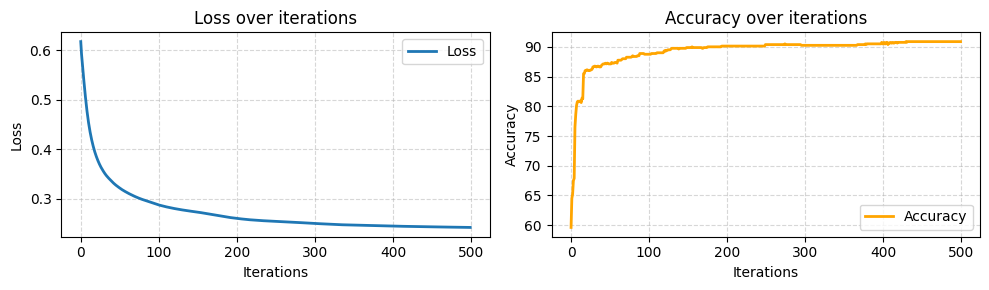

In [30]:
#loss plot
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(loss_values, lw=2,  label='Loss')
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
#accu
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy', color='orange', lw=2)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True, ls='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### 13. Preditive Analysis & Decision Boundary 

In [31]:
def model_predict(X, parameters):
    #forward propagation to predict probabilities
    activation_layer, i = forward_propagation(X, parameters)
    #convert probabilities to 0 or 1 using 0.5 as a threshold
    predictions = activation_layer > 0.5
    return predictions

In [32]:
def compute_accuracy(predictions, y):
    #ensure y is reshaped for comparison
    y = y.reshape(predictions.shape)
    #number of correct predictions
    correct_predictions = np.sum(predictions == y)
    #accuracy by dividing correct predictions by total number of predictions
    #y.shape[0] if y is shaped as (m, 1)
    accuracy = correct_predictions / y.shape[1]  
    #accuracy in percentage
    return accuracy * 100 

In [33]:
#making predictions 
predictions = model_predict(X_test, parameters)
predictions[0][:20]

array([ True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False])

In [34]:
#calculating accuracy
accuracy = compute_accuracy(predictions, y_test)
print(f"Accuracy: {accuracy}%")

Accuracy: 91.0%


In [35]:
def plot_decision_boundary(model, X, y):
    #min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #size in the mesh
    h = 0.01  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #Flatten the grid to pass into the model
    Z = model(np.c_[xx.ravel(), yy.ravel()].T, parameters)
    #Threshold to get binary predictions
    Z = Z > 0.5  
    Z = Z.reshape(xx.shape)
    #Plot the contour
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    #markers for Class 0 and Class 1
    class0_color = 'blue'
    class0_marker = 'o'
    class1_color = 'red'
    class1_marker = 's'
    #Class 0 and Class 1
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c=class0_color, marker=class0_marker, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c=class1_color, marker=class1_marker, label='Class 1')
    #decision boundary
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.xlabel('Age')
    plt.ylabel('Annual Salary')
    plt.title("Decision Boundary")
    custom_legend_labels = {
        'Class 0': {'color': class0_color, 'marker': class0_marker},
        'Class 1': {'color': class1_color, 'marker': class1_marker}
    }
    handles = [plt.Line2D([], [], marker=properties['marker'], color=properties['color'], 
                          label=label, markersize=10) 
               for label, properties in custom_legend_labels.items()]
    
    plt.legend(handles=handles, loc='best')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.show()

    
#predict function for the decision boundary plotting
def model_predict(X, parameters):
    X = X.T
    #run forward propagation to predict probabilities
    activation_layer, i = forward_propagation(X, parameters)
    #converting probabilities to 0 or 1 using 0.5 as a threshold
    predictions = activation_layer > 0.5
    return predictions

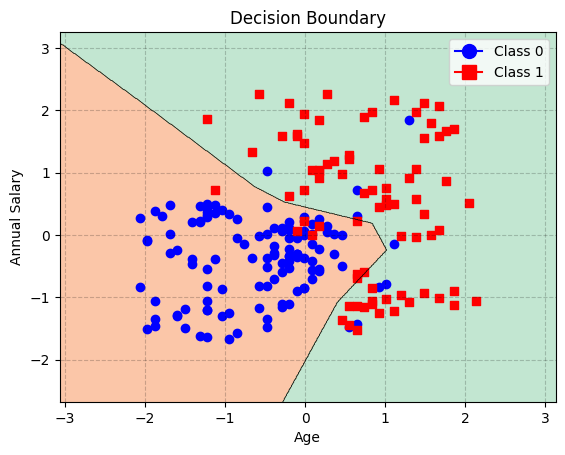

In [36]:
#decision boundary for the test set
#X_test.T to match the expected input shape
plot_decision_boundary(model_predict, X_test, y_test)  

#### 14. Model Evaluation & Classification Report

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
#reshaping predictions
predictions_reshaped = predictions.reshape(-1).astype(int)

In [39]:
#calcualting confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_reshaped)

In [40]:
#truth table
conf_matrix

array([[112,   9],
       [  9,  70]], dtype=int64)

In [41]:
#manually calcaulting accuracy, precision, recall and f1 score
tn, fp, fn, tp = conf_matrix.ravel()
true_predictions = tp + tn
false_predictions = fp + fn
total_predictions = true_predictions + false_predictions
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

In [42]:
#printing result
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 70
True Negatives (TN): 112
False Positives (FP): 9
False Negatives (FN): 9


In [43]:
#total predictions
print(f"Total True Predictions (TP + TN): {true_predictions}")
print(f"Total False Predictions (FP + FN): {false_predictions}")
print(f"Total Predictions: {total_predictions}")

Total True Predictions (TP + TN): 182
Total False Predictions (FP + FN): 18
Total Predictions: 200


In [44]:
#classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.91
Precision: 0.8860759493670886
Recall: 0.8860759493670886
F1 Score: 0.8860759493670886


In [45]:
def model_predict_proba(X, parameters):
    #forward propagation to predict probabilities
    activation_layer, _ = forward_propagation(X, parameters)
    #return the probabilities without applying a threshold
    return activation_layer

In [46]:
y_proba = model_predict_proba(X_test, parameters).reshape(-1)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

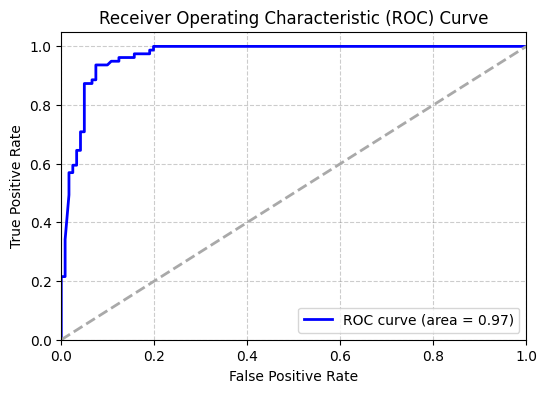

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend(loc='lower right')
plt.show()

### References

- [Scikit-Learn Confusion Matrix Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

- [TensorFlow TFX Serving Architecture Documentation](https://www.tensorflow.org/tfx/serving/architecture)
